# 1. 데이터 불러오기와 데이터셋 나누기

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd

In [3]:
data=pd.read_csv('Fvote.csv', encoding='utf-8')

In [4]:
X=data[['gender_female', 'gender_male', 'region_Chungcheung', 'region_Honam', 
        'region_Others', 'region_Sudo', 'region_Youngnam', 'edu', 'income', 
        'age', 'score_gov', 'score_progress', 'score_intention']]

In [5]:
y=data[['parties']]

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=42 )

# 2. Grid Search 

In [8]:
from sklearn.model_selection import GridSearchCV

In [9]:
param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9 , 10]}

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
grid_search=GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

In [12]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [13]:
print("Best Parameter: {}".format(grid_search.best_params_))

Best Parameter: {'n_neighbors': 8}


In [14]:
print("Best Cross-validity Score: {:.3f}".format(grid_search.best_score_))

Best Cross-validity Score: 0.392


In [15]:
print("Test set Score: {:.3f}".format(grid_search.score(X_test, y_test)))

Test set Score: 0.415


In [16]:
result_grid= pd.DataFrame(grid_search.cv_results_)

In [17]:
result_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.0026,1.200032e-03,0.0016,7.999539e-04,1,{'n_neighbors': 1},0.363636,0.272727,0.419355,0.387097,...,0.373418,0.057183,4,0.992,1.000,0.992126,0.992126,1.000000,0.995250,0.003878
1,0.0012,3.999710e-04,0.0010,0.000000e+00,2,{'n_neighbors': 2},0.363636,0.303030,0.322581,0.258065,...,0.316456,0.035114,10,0.680,0.688,0.669291,0.669291,0.687500,0.678817,0.008278
2,0.0014,4.898235e-04,0.0010,0.000000e+00,3,{'n_neighbors': 3},0.424242,0.272727,0.354839,0.354839,...,0.360759,0.052597,6,0.608,0.656,0.629921,0.598425,0.648438,0.628157,0.022271
3,0.0012,4.000425e-04,0.0008,3.999949e-04,4,{'n_neighbors': 4},0.363636,0.303030,0.290323,0.322581,...,0.335443,0.040108,9,0.600,0.600,0.637795,0.598425,0.632812,0.613807,0.017632
4,0.0012,4.000425e-04,0.0008,4.000187e-04,5,{'n_neighbors': 5},0.515152,0.303030,0.290323,0.354839,...,0.367089,0.081373,5,0.560,0.584,0.622047,0.622047,0.593750,0.596369,0.023670
5,0.0012,3.998995e-04,0.0008,3.999949e-04,6,{'n_neighbors': 6},0.393939,0.333333,0.322581,0.290323,...,0.341772,0.035952,8,0.528,0.592,0.590551,0.551181,0.554688,0.563284,0.024631
6,0.0010,9.536743e-08,0.0006,4.899403e-04,7,{'n_neighbors': 7},0.454545,0.303030,0.387097,0.354839,...,0.379747,0.051068,2,0.512,0.552,0.543307,0.566929,0.500000,0.534847,0.025025
7,0.0012,4.000425e-04,0.0006,4.899014e-04,8,{'n_neighbors': 8},0.424242,0.393939,0.451613,0.290323,...,0.392405,0.054365,1,0.544,0.560,0.543307,0.543307,0.523438,0.542810,0.011599
8,0.0010,9.536743e-08,0.0010,1.907349e-07,9,{'n_neighbors': 9},0.393939,0.363636,0.354839,0.354839,...,0.379747,0.029748,2,0.488,0.504,0.535433,0.535433,0.500000,0.512573,0.019394
9,0.0010,9.536743e-08,0.0008,3.999949e-04,10,{'n_neighbors': 10},0.333333,0.303030,0.322581,0.354839,...,0.348101,0.044563,7,0.496,0.512,0.519685,0.559055,0.507812,0.518911,0.021485


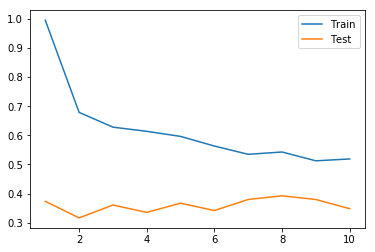

In [19]:
import matplotlib.pyplot as plt
plt.plot(result_grid['param_n_neighbors'], result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_n_neighbors'], result_grid['mean_test_score'], label="Test")
plt.legend()

# 3. Random Search

In [20]:
from sklearn.model_selection import RandomizedSearchCV

In [21]:
from scipy.stats import randint

In [22]:
param_distribs = {'n_neighbors': randint(low=1, high=20)}

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
random_search=RandomizedSearchCV(KNeighborsClassifier(), param_distributions=param_distribs, cv=5)

In [25]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000000A4406D8>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [26]:
print("Best Parameter: {}".format(random_search.best_params_))

Best Parameter: {'n_neighbors': 19}


In [27]:
print("Best Cross-validity Score: {:.3f}".format(random_search.best_score_))

Best Cross-validity Score: 0.424


In [28]:
print("Test set Score: {:.3f}".format(random_search.score(X_test, y_test)))

Test set Score: 0.302


In [29]:
result_random = random_search.cv_results_

In [30]:
pd.DataFrame(result_random)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.0018,9.797833e-04,0.0016,8.000493e-04,19,{'n_neighbors': 19},0.363636,0.424242,0.387097,0.387097,...,0.424051,0.071834,1,0.488,0.528,0.448819,0.472441,0.492188,0.485889,0.025971
1,0.0012,4.000187e-04,0.0006,4.899014e-04,3,{'n_neighbors': 3},0.424242,0.272727,0.354839,0.354839,...,0.360759,0.052597,6,0.608,0.656,0.629921,0.598425,0.648438,0.628157,0.022271
2,0.0016,4.899598e-04,0.0008,3.999710e-04,2,{'n_neighbors': 2},0.363636,0.303030,0.322581,0.258065,...,0.316456,0.035114,10,0.680,0.688,0.669291,0.669291,0.687500,0.678817,0.008278
3,0.0012,4.000425e-04,0.0010,1.168008e-07,13,{'n_neighbors': 13},0.242424,0.303030,0.290323,0.290323,...,0.322785,0.088356,7,0.520,0.504,0.448819,0.488189,0.484375,0.489077,0.023759
4,0.0014,4.898430e-04,0.0008,3.999949e-04,11,{'n_neighbors': 11},0.272727,0.303030,0.354839,0.322581,...,0.322785,0.034236,7,0.512,0.528,0.511811,0.551181,0.468750,0.514348,0.026960
5,0.0014,4.899403e-04,0.0006,4.898624e-04,8,{'n_neighbors': 8},0.424242,0.393939,0.451613,0.290323,...,0.392405,0.054365,3,0.544,0.560,0.543307,0.543307,0.523438,0.542810,0.011599
6,0.0010,9.536743e-08,0.0008,3.999949e-04,11,{'n_neighbors': 11},0.272727,0.303030,0.354839,0.322581,...,0.322785,0.034236,7,0.512,0.528,0.511811,0.551181,0.468750,0.514348,0.026960
7,0.0014,4.898819e-04,0.0004,4.898624e-04,1,{'n_neighbors': 1},0.363636,0.272727,0.419355,0.387097,...,0.373418,0.057183,4,0.992,1.000,0.992126,0.992126,1.000000,0.995250,0.003878
8,0.0012,4.000187e-04,0.0006,4.899014e-04,17,{'n_neighbors': 17},0.363636,0.393939,0.483871,0.387097,...,0.411392,0.042165,2,0.472,0.512,0.433071,0.480315,0.460938,0.471665,0.025715
9,0.0010,9.536743e-08,0.0008,4.000187e-04,1,{'n_neighbors': 1},0.363636,0.272727,0.419355,0.387097,...,0.373418,0.057183,4,0.992,1.000,0.992126,0.992126,1.000000,0.995250,0.003878


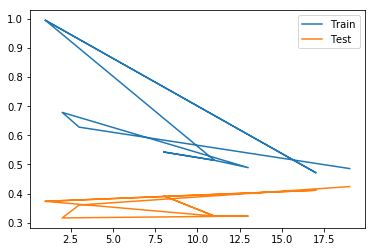

In [31]:
import matplotlib.pyplot as plt
plt.plot(result_random['param_n_neighbors'], result_random['mean_train_score'], label="Train")
plt.plot(result_random['param_n_neighbors'], result_random['mean_test_score'], label="Test")
plt.legend()

# 4. 모델평가

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
knn3=KNeighborsClassifier(n_neighbors=8)

In [34]:
knn3.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')

In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
pred_train=knn3.predict(X_train)

In [37]:
confusion_train=confusion_matrix(y_train, pred_train)

In [38]:
print("훈련데이터 오차행렬:\n", confusion_train)

훈련데이터 오차행렬:
 [[20  0  2 15]
 [ 3 15  0 19]
 [ 3  3  2 11]
 [10  6  1 48]]


In [39]:
pred_test=knn3.predict(X_test)

In [40]:
confusion_test=confusion_matrix(y_test, pred_test)

In [41]:
print("테스트데이터 오차행렬:\n", confusion_test)

테스트데이터 오차행렬:
 [[ 5  0  1  7]
 [ 2  4  1  9]
 [ 3  1  0  2]
 [ 3  1  1 13]]


In [42]:
from sklearn.metrics import f1_score

In [44]:
f1=f1_score(y_test, pred_test, average="micro" )

In [46]:
print("micro f1 score:\n", f1)

micro f1 score:
 0.41509433962264153


In [47]:
f2=f1_score(y_test, pred_test, average="macro" )

In [48]:
print("macro f1 score:\n", f2)

macro f1 score:
 0.3197159982874269


In [49]:
from sklearn.metrics import classification_report

In [50]:
cfreport=classification_report(y_test, pred_test)

In [51]:
print("분류예측 레포트:\n", cfreport)

분류예측 레포트:
              precision    recall  f1-score   support

          1       0.38      0.38      0.38        13
          2       0.67      0.25      0.36        16
          3       0.00      0.00      0.00         6
          4       0.42      0.72      0.53        18

avg / total       0.44      0.42      0.38        53

